In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
dataset = pd.read_csv('student_per.csv')
dataset.head(6)

,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade
0,1,18.5,95.6,3.8,97.9,A
1,2,14.0,80.0,2.5,83.9,B
2,3,19.5,86.3,5.3,100.0,A
3,4,25.7,70.2,7.0,100.0,A
4,5,13.4,81.9,6.9,92.0,A
5,6,13.4,65.1,5.0,97.5,A


In [59]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   student_id               998 non-null    int64  
 1   weekly_self_study_hours  998 non-null    float64
 2   attendance_percentage    998 non-null    float64
 3   class_participation      998 non-null    float64
 4   total_score              998 non-null    float64
 5   grade                    998 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 46.9+ KB


In [60]:
new_data =dataset[dataset.select_dtypes(include= 'float64').columns]
new_data.head(6)

,weekly_self_study_hours,attendance_percentage,class_participation,total_score
0,18.5,95.6,3.8,97.9
1,14.0,80.0,2.5,83.9
2,19.5,86.3,5.3,100.0
3,25.7,70.2,7.0,100.0
4,13.4,81.9,6.9,92.0
5,13.4,65.1,5.0,97.5


In [61]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   weekly_self_study_hours  998 non-null    float64
 1   attendance_percentage    998 non-null    float64
 2   class_participation      998 non-null    float64
 3   total_score              998 non-null    float64
dtypes: float64(4)
memory usage: 31.3 KB


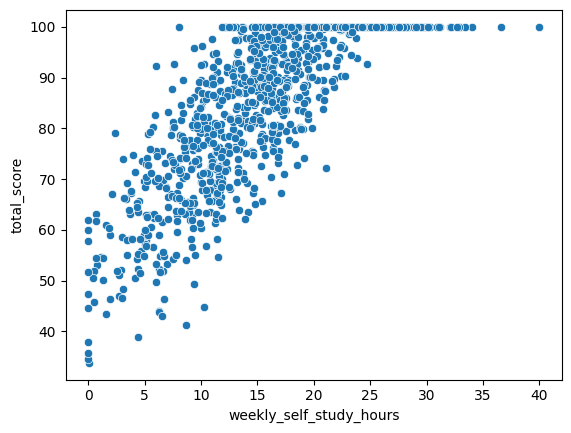

In [62]:
sns.scatterplot(x= 'weekly_self_study_hours',y="total_score",data= dataset)
plt.show()

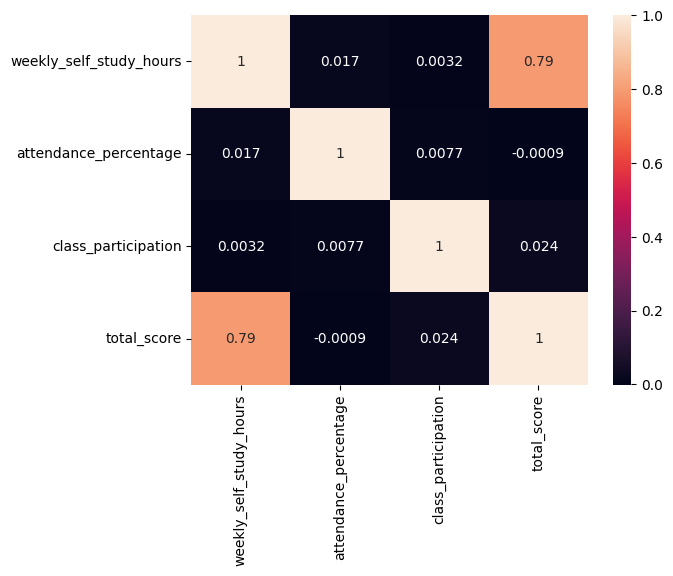

In [63]:
sns.heatmap(data = new_data.corr(),annot=True)
plt.show()

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x=new_data[['weekly_self_study_hours']]
y= new_data['total_score']

In [67]:
ss = StandardScaler()
ss.fit(x)
x= pd.DataFrame(ss.transform(x),columns= x.columns)
x.head(4)

,weekly_self_study_hours
0,0.492275
1,-0.170874
2,0.639641
3,1.553314


In [68]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [69]:
from sklearn.linear_model import LinearRegression ,Lasso ,Ridge

In [70]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

**Linear Regression**

In [71]:
lr = LinearRegression()
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [72]:
lr.score(x_test,y_test)*100

62.536821314028

In [73]:
mean_squared_error(y_test,lr.predict(x_test))

84.86551091429638

In [74]:
mean_absolute_error(y_test,lr.predict(x_test))

7.259218625344788

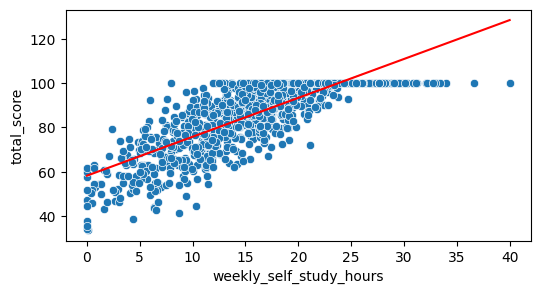

In [75]:
plt.figure(figsize=(6,3))
sns.scatterplot(x= 'weekly_self_study_hours',y="total_score",data= dataset)
sns.lineplot(x='weekly_self_study_hours',y=lr.predict(x),data= dataset ,color = 'red')
plt.show()

**Lasso**

In [76]:
la = Lasso()
la.fit(x_train,y_train)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [77]:
la.score(x_test,y_test)*100

61.788906471901406

In [78]:
mean_squared_error(y_test,la.predict(x_test))

86.55976584470426

In [79]:
mean_absolute_error(y_test,la.predict(x_test))

7.343134769088775

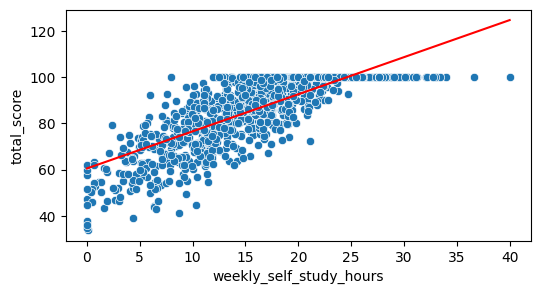

In [80]:
plt.figure(figsize=(6,3))
sns.scatterplot(x= 'weekly_self_study_hours',y="total_score",data= dataset)
sns.lineplot(x='weekly_self_study_hours',y=la.predict(x),data= dataset ,color = 'red')
plt.show()

**Ridge**

In [81]:
ri = Ridge()
ri.fit(x_train,y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [82]:
ri.score(x_test,y_test)*100

62.531573415185235

In [83]:
mean_squared_error(y_test,ri.predict(x_test))

84.87739900367211

In [84]:
mean_absolute_error(y_test,ri.predict(x_test))

7.259862977238162

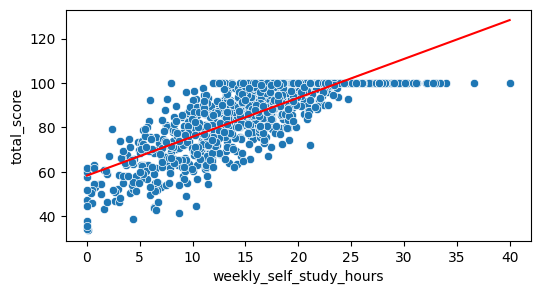

In [85]:
plt.figure(figsize=(6,3))
sns.scatterplot(x= 'weekly_self_study_hours',y="total_score",data= dataset)
sns.lineplot(x='weekly_self_study_hours',y=ri.predict(x),data= dataset ,color = 'red')
plt.show()